<a href="https://colab.research.google.com/github/susan291-gifs/SussieAssignment/blob/main/BinaryClassificationOfIris_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

###Problem 1

<ipython-input-77-cddaee5d432c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['species'] = selected_data['species'].astype(str)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)


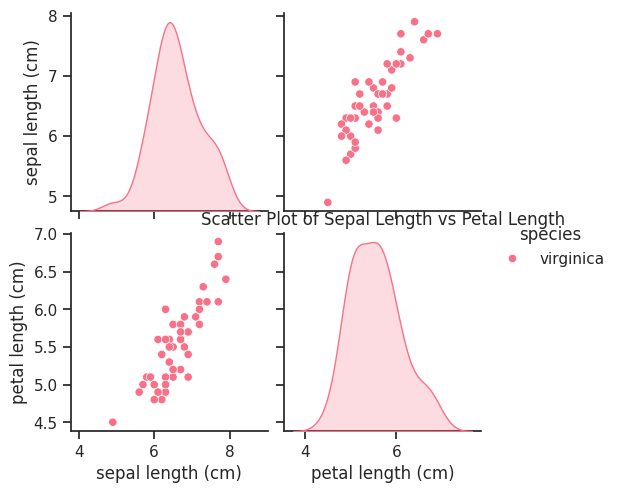

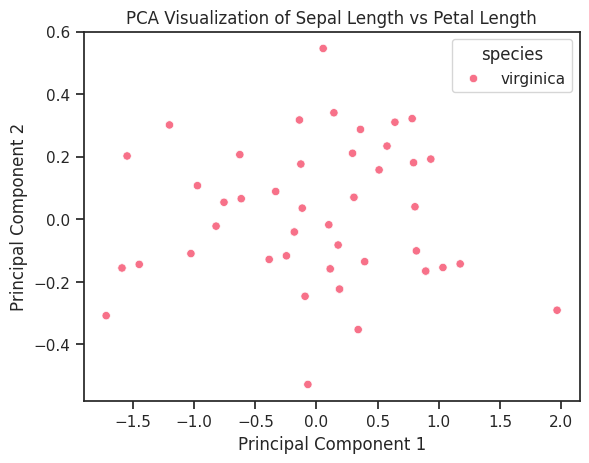

In [ ]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris.target_names[iris.target]

extracted_data = iris_df[iris_df['species'].isin(['virgicolor', 'virginica'])]

selected_features = ['sepal length (cm)', 'petal length (cm)']
selected_data = extracted_data[['sepal length (cm)', 'petal length (cm)', 'species']]
selected_data['species'] = selected_data['species'].astype(str)

sns.set(style="ticks")
sns.pairplot(selected_data, hue="species", markers=["o", "s"], palette="husl")
plt.title('Scatter Plot of Sepal Length vs Petal Length')
plt.show()

X = selected_data.iloc[:, :-1].values
y = selected_data.iloc[:, -1].values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', palette="husl")
plt.title('PCA Visualization of Sepal Length vs Petal Length')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

###Problem 2

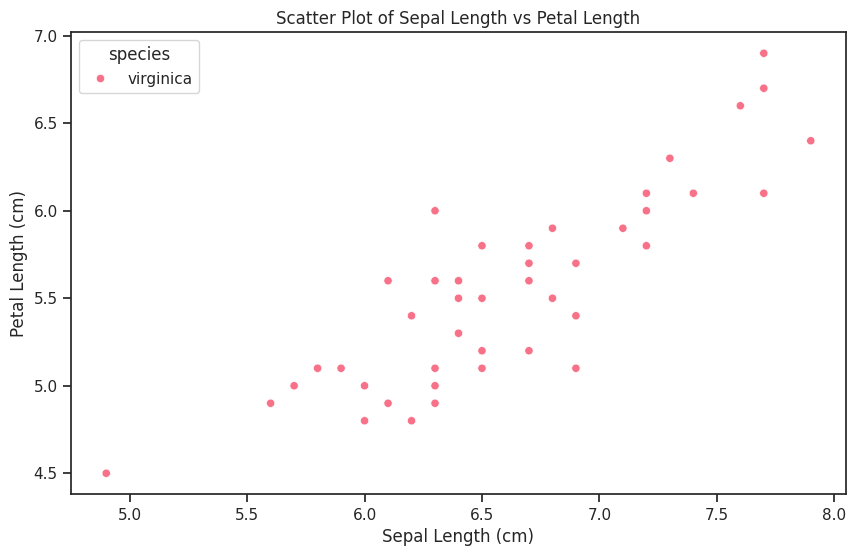

<ipython-input-78-6d678118414c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=selected_data, x='species', y='sepal length (cm)', palette='husl')


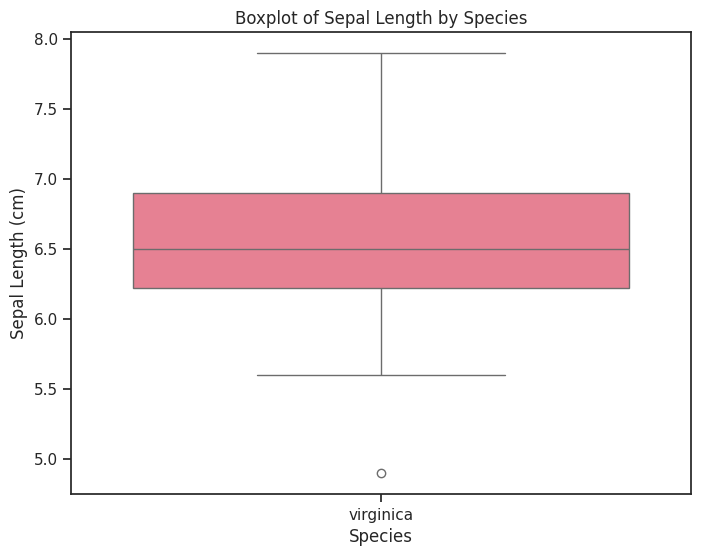

<ipython-input-78-6d678118414c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=selected_data, x='species', y='petal length (cm)', palette='husl')


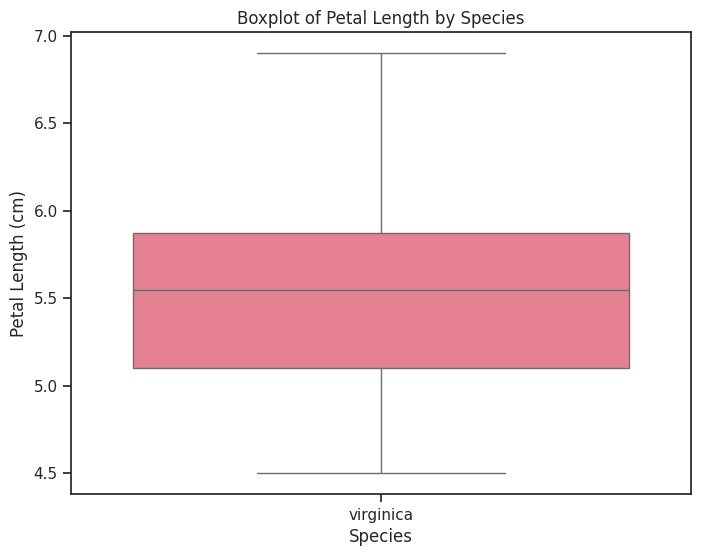

<ipython-input-78-6d678118414c>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=selected_data, x='species', y='sepal length (cm)', palette='husl')


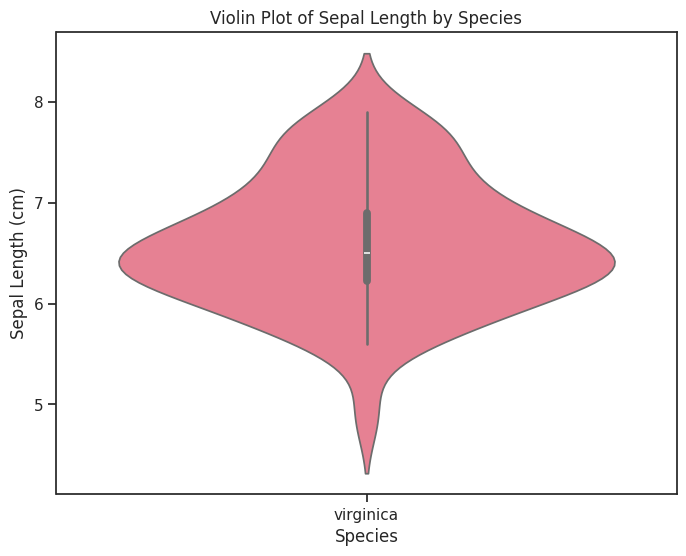

<ipython-input-78-6d678118414c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=selected_data, x='species', y='petal length (cm)', palette='husl')


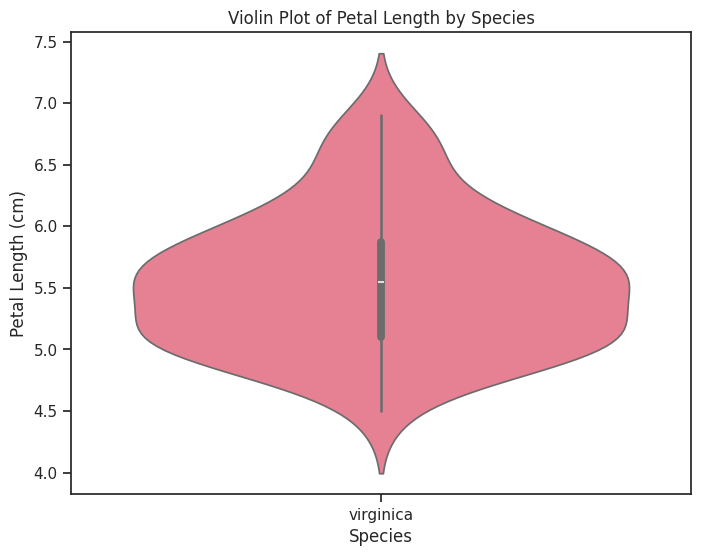

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=selected_data, x='sepal length (cm)', y='petal length (cm)', hue='species', palette='husl')
plt.title('Scatter Plot of Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=selected_data, x='species', y='sepal length (cm)', palette='husl')
plt.title('Boxplot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=selected_data, x='species', y='petal length (cm)', palette='husl')
plt.title('Boxplot of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(data=selected_data, x='species', y='sepal length (cm)', palette='husl')
plt.title('Violin Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(data=selected_data, x='species', y='petal length (cm)', palette='husl')
plt.title('Violin Plot of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

###Problem 3

In [ ]:
X = selected_data[['sepal length (cm)', 'petal length (cm)']].values
y = np.where(selected_data['species'] == 'virgicolor', 0, 1)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (37, 2)
y_train shape: (37,)
X_val shape: (13, 2)
y_val shape: (13,)


###Problem 4

In [ ]:

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


print("Scaled X_train:")
print(X_train_scaled[:5])


print("\nScaled X_val:")
print(X_val_scaled[:5])

Scaled X_train:
[[ 1.90453692  2.36270094]
 [ 0.90262413  0.74755203]
 [ 0.40166774 -0.06002243]
 [-1.43517237 -1.0694905 ]
 [ 0.40166774  0.74755203]]

Scaled X_val:
[[-0.26627412  0.14187119]
 [ 0.23468227  0.14187119]
 [ 1.90453692  2.76648817]
 [ 1.90453692  1.15133926]
 [-1.26818691 -0.86759688]]


###Problem 5

In [ ]:

def train_and_evaluate(n_neighbors, X_train, y_train, X_val, y_val):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy for {n_neighbors}-NN: {accuracy:.2f}")
    return knn

n_neighbors_list = [1, 3, 5]
classifiers = []

for n_neighbors in n_neighbors_list:
    print(f"\nTraining and evaluating {n_neighbors}-NN classifier:")
    knn_classifier = train_and_evaluate(n_neighbors, X_train_scaled, y_train, X_val_scaled, y_val)
    classifiers.append(knn_classifier)


Training and evaluating 1-NN classifier:
Accuracy for 1-NN: 1.00

Training and evaluating 3-NN classifier:
Accuracy for 3-NN: 1.00

Training and evaluating 5-NN classifier:
Accuracy for 5-NN: 1.00


###Problem 6

In [ ]:
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)


    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")


    print("\nConfusion Matrix:")
    print(confusion_matrix(y_val, y_pred))


for n_neighbors, knn_classifier in zip(n_neighbors_list, classifiers):
    print(f"\nEvaluation for {n_neighbors}-NN classifier:")
    evaluate_model(knn_classifier, X_val_scaled, y_val)


Evaluation for 1-NN classifier:
Evaluation Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00

Confusion Matrix:
[[13]]

Evaluation for 3-NN classifier:
Evaluation Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00

Confusion Matrix:
[[13]]

Evaluation for 5-NN classifier:
Evaluation Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00

Confusion Matrix:
[[13]]


###Problem 7

In [ ]:
def decision_region(X, y, model, step=0.01, title='Decision Region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Visualizes the decision region of a binary classification model trained on 2-dimensional features.

    Parameters:
    X : ndarray, shape(n_samples, 2)
        Feature matrix.
    y : ndarray, shape(n_samples,)
        Target vector.
    model : object
        Trained classification model instance.
    step : float, optional (default=0.01)
        Step size for meshgrid.
    title : str, optional (default='Decision Region')
        Title of the plot.
    xlabel : str, optional (default='xlabel')
        Label for the x-axis.
    ylabel : str, optional (default='ylabel')
        Label for the y-axis.
    target_names : list of str, optional (default=['versicolor', 'virginica'])
        Names of the target classes for legend.
    """
    # Setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = len(np.unique(y))

    # Create meshgrid
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step),
                                   np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)

    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    plt.legend()
    plt.show()


Decision region visualization for 1-NN classifier:


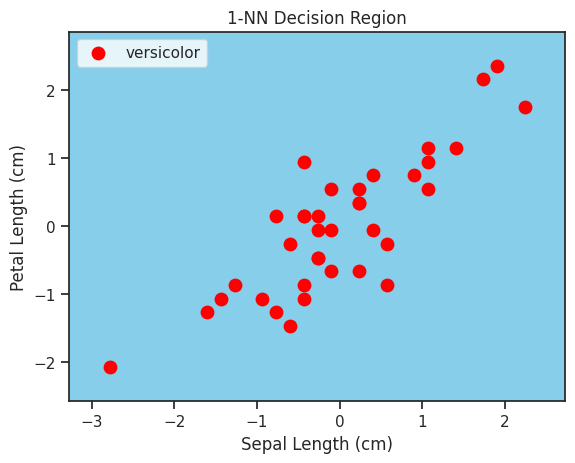


Decision region visualization for 3-NN classifier:


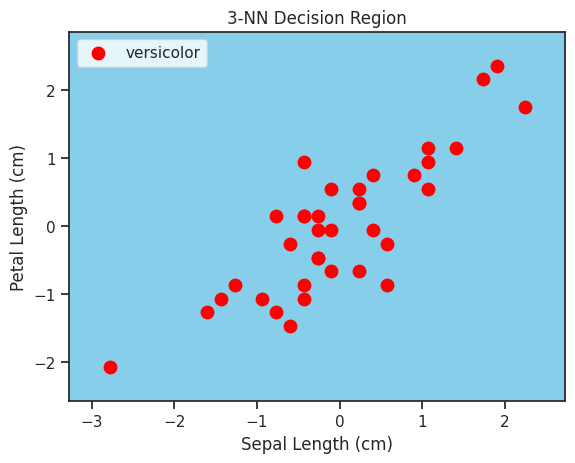


Decision region visualization for 5-NN classifier:


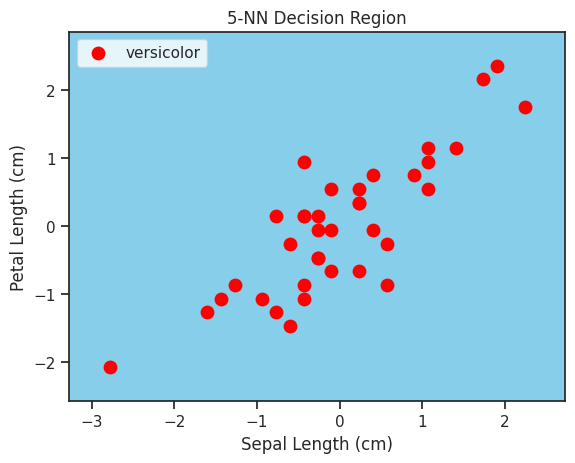

In [ ]:
def visualize_decision_region(X, y, model, title):
    decision_region(X, y, model, title=title, xlabel='Sepal Length (cm)', ylabel='Petal Length (cm)')


for n_neighbors, knn_classifier in zip(n_neighbors_list, classifiers):
    print(f"\nDecision region visualization for {n_neighbors}-NN classifier:")
    visualize_decision_region(X_train_scaled, y_train, knn_classifier, title=f"{n_neighbors}-NN Decision Region")

###Problem 8


Decision region visualization for K-Nearest Neighbors:


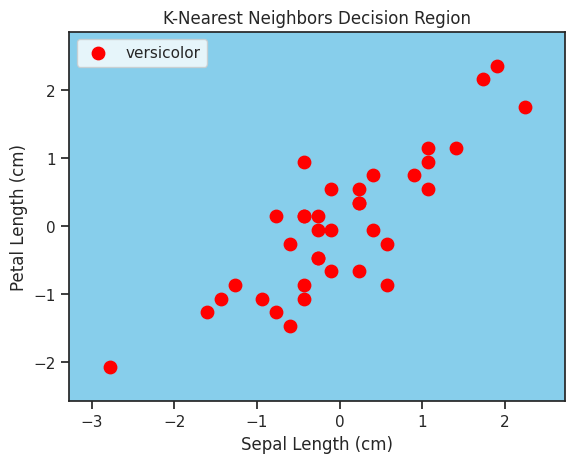


Evaluation metrics for K-Nearest Neighbors:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [ ]:
logistic_regression = LogisticRegression(solver='liblinear', class_weight='balanced')

svm_classifier = SVC(kernel='linear', class_weight='balanced')

classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": logistic_regression,
    "SVM": svm_classifier,
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for method, clf in classifiers.items():

    clf.fit(X_train_scaled, y_train)


    y_pred = clf.predict(X_val_scaled)


    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)


    print(f"\nDecision region visualization for {method}:")
    visualize_decision_region(X_train_scaled, y_train, clf, title=f"{method} Decision Region")


    print(f"\nEvaluation metrics for {method}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")